Dataset Head:
   ID  Weight (grams)   Material Type  Toxicity Level  Recyclability (%)  \
0   1             960  Plastic Casing        0.877166                 74   
1   2            3872  Plastic Casing        0.930664                 37   
2   3            3192   Circuit Board        0.519130                 82   
3   4             566     Metal Frame        0.532753                 84   
4   5            4526         Battery        0.926609                 61   

   Decomposition Time (years)  
0                         161  
1                         170  
2                          46  
3                          25  
4                          46  
Accuracy: 0.20
Classification Report:
              precision    recall  f1-score   support

           0       0.21      0.26      0.24        23
           1       0.25      0.16      0.19        19
           2       0.19      0.38      0.25        16
           3       0.17      0.18      0.17        17
           4       0.20     

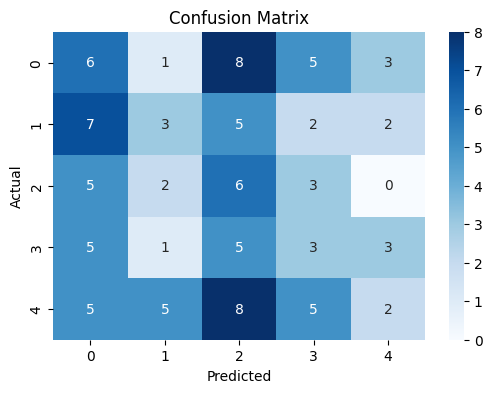

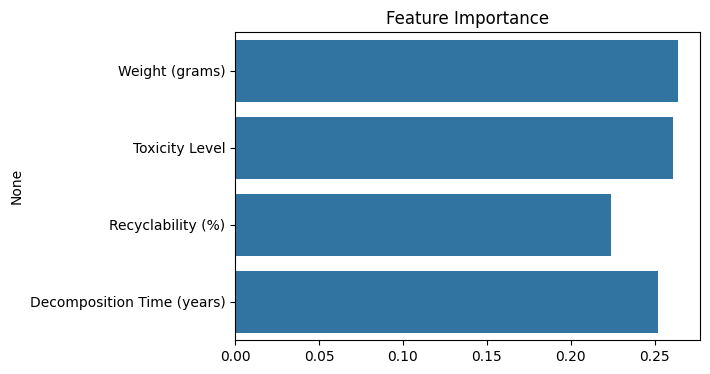

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder

# Load dataset
df = pd.read_csv("e_waste_dataset.csv")
print("Dataset Head:")
print(df.head())

# Encoding categorical features
le = LabelEncoder()
df['Material Type'] = le.fit_transform(df['Material Type'])

# Splitting data into features and target
X = df[['Weight (grams)', 'Toxicity Level', 'Recyclability (%)', 'Decomposition Time (years)']]
y = df['Material Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

# Predictions
y_pred = clf.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance
feature_importance = clf.feature_importances_
plt.figure(figsize=(6, 4))
sns.barplot(x=feature_importance, y=X.columns)
plt.title("Feature Importance")
plt.show()


In [9]:
# Function to check model accuracy
def check_accuracy(model, X_test, y_test):
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Model Accuracy: {acc:.2f}")
    return acc

In [10]:
# Call the function
check_accuracy(clf, X_test, y_test)

Model Accuracy: 0.20


0.2

In [11]:
import pickle

# Save the trained model
model_filename = "e_waste_model.pkl"
with open(model_filename, 'wb') as file:
    pickle.dump(clf, file)

print(f"Model saved as {model_filename}")


Model saved as e_waste_model.pkl
